# Дашборд для Яндекс.Дзен

**Цель -** анализ взаимодействия пользователей с карточками Яндекс.Дзен.


**Ход исследования:**
1. [Предобработка](#preprocessing);
2. [Проведение исследовательского анализа данных](#analysis):
- Исследование времени посещения.
- Исследование возрастных категорий посетителей.
- Исследование тем карточек.
- Исследование тем источников.
3. [Общий вывод](#conclusion); 
- [cсылка на дашборд.](#tableau);
- [cсылка на отчет.](#report).

<a id="preprocessing"> </a>
# 1. Предобработка данных.

In [177]:
# Импорт библиотек

import pandas as pd

import seaborn as sns

In [16]:
# Загрузка данных

data = pd.read_csv('dash_visits.csv', index_col='Unnamed: 0')

In [18]:
# Загрузка общей информации

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   record_id     30745 non-null  int64 
 1   item_topic    30745 non-null  object
 2   source_topic  30745 non-null  object
 3   age_segment   30745 non-null  object
 4   dt            30745 non-null  object
 5   visits        30745 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [20]:
data.head(10)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


In [29]:
# Подсчет и удаление явных дубликатов

print(data.duplicated().sum())
data = data.drop_duplicates()

0


В имеющимся датасете 6 столбцов и 30745 строк. Пропущенных значений нет, явных дубликатов - нет.

<a id="analysis"> </a>
# 2. Проведение исследовательского анализа данных

## 2.1. Исследование времени посещения.

In [116]:
# Проверка значений столбца 'dt'

date_record = data['dt'].value_counts().sort_index(ascending=True)
date_record

2019-09-24 18:28:00     615
2019-09-24 18:29:00    1031
2019-09-24 18:30:00    1261
2019-09-24 18:31:00    1253
2019-09-24 18:32:00    1257
2019-09-24 18:33:00    1007
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
2019-09-24 18:52:00     719
2019-09-24 18:53:00    1107
2019-09-24 18:54:00    2551
2019-09-24 18:55:00    3088
2019-09-24 18:56:00    3325
2019-09-24 18:57:00    3342
2019-09-24 18:58:00    3383
2019-09-24 18:59:00    3317
2019-09-24 19:00:00    2729
Name: dt, dtype: int64

Имеющийся датасет охватывает промежуток времени с 18.28 до 19.00 24 сентября 2019 г.

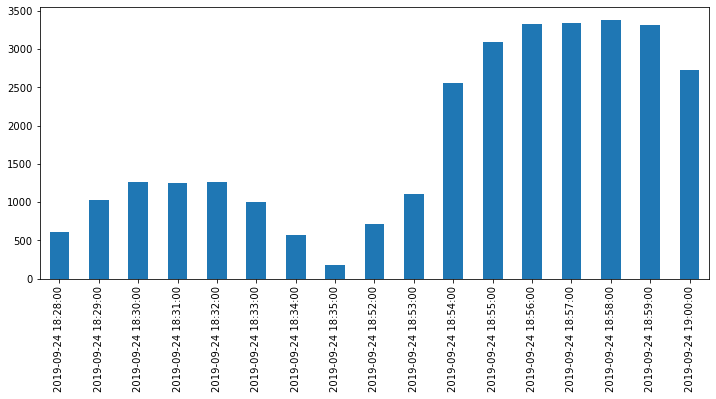

In [117]:
date_record.plot.bar(figsize=(12,5));

Мы наблюдаем взрывной рост количества записей в 18.54 и спад после 18.59.

In [140]:
pd.crosstab(data['dt'], data['age_segment'], margins=False).sort_values(by='dt', ascending=True)

age_segment,18-25,26-30,31-35,36-40,41-45,45+
dt,,,,,,
2019-09-24 18:28:00,218,138,114,79,38,28
2019-09-24 18:29:00,312,224,190,162,92,51
2019-09-24 18:30:00,390,248,244,200,107,72
2019-09-24 18:31:00,384,257,238,191,112,71
2019-09-24 18:32:00,371,281,222,199,127,57
2019-09-24 18:33:00,314,198,189,167,86,53
2019-09-24 18:34:00,203,137,100,71,42,23
2019-09-24 18:35:00,75,34,28,28,11,8
2019-09-24 18:52:00,254,153,129,97,51,35


Выполнив группировку записей по возрастным категориям, мы видим что рост и падение значений начинаются во всех возрастных группах примерно одновременно.

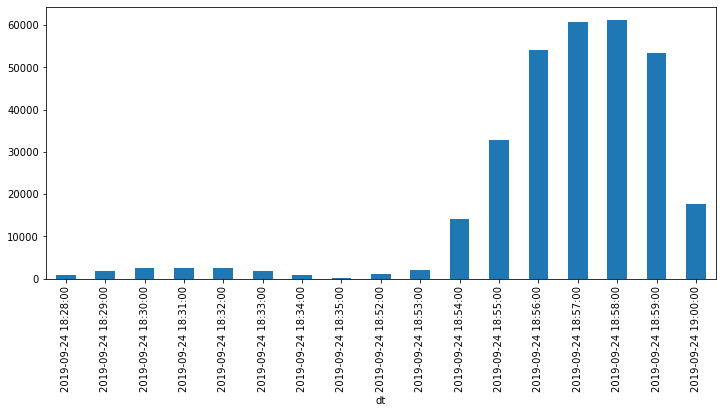

In [137]:
data.groupby('dt')['visits'].sum().sort_index(ascending=True).plot.bar(figsize=(12,5));

Количество просмотров растет с 18.54 до 18.59.

## 2.2. Исследование возрастных категорий.

In [118]:
groupby_age_segment = data.groupby('age_segment')['age_segment'].count()
groupby_age_segment

age_segment
18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

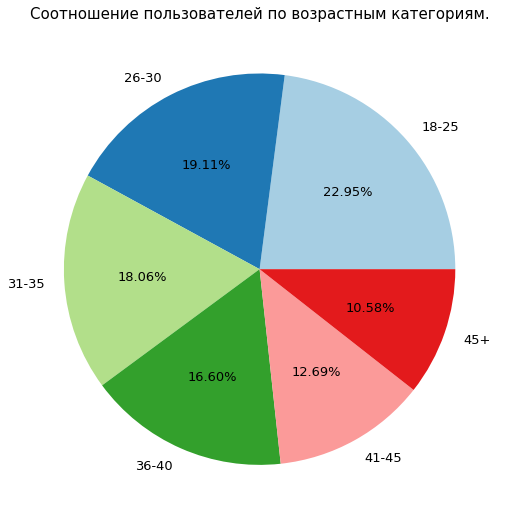

In [120]:
color = sns.color_palette("Paired")
plt.figure(figsize=(9,9))
plt.title('Соотношение пользователей по возрастным категориям.', fontsize=15)
plt.pie(groupby_age_segment, labels = groupby_age_segment.index, autopct='%1.2f%%', colors=color, textprops={'fontsize': 13})

plt.show()

Самая многочисленная группа пользователь в возрастной категории "18-25". Меньше всего пользователей в категории "45+".

## 2.3. Исследование тем карточек.

## Топ-5 тем карточек по количеству опубликованных записей.

In [157]:
# Проверка значений столбца 'item_topic'

data['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

25 тем карточек. Самые популярные без разбивки на возрастной диапазон - "Отношения", "Интересные факты", "Наука"

In [66]:
# Создадим кросс-таблицу для оценки количества карточек с разными темами (с разбивкой по возрасту)

item_topic_age_segment = pd.crosstab(data['item_topic'], data['age_segment'], margins=False)
item_topic_age_segment 

In [60]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "18-25")

item_topic_age_segment['18-25'].sort_values(ascending=False).head(5)

item_topic
Отношения           336
Интересные факты    332
Наука               328
Общество            326
Подборки            320
Name: 18-25, dtype: int64

In [61]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "26-30")

item_topic_age_segment['26-30'].sort_values(ascending=False).head(5)

item_topic
Отношения           294
Интересные факты    292
Наука               286
Подборки            279
Общество            272
Name: 26-30, dtype: int64

In [62]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "31-35")

item_topic_age_segment['31-35'].sort_values(ascending=False).head(5)

item_topic
Наука               274
Интересные факты    272
Отношения           272
Подборки            260
Общество            251
Name: 31-35, dtype: int64

In [63]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "36-40")

item_topic_age_segment['36-40'].sort_values(ascending=False).head(5)

item_topic
Интересные факты    255
Наука               248
Полезные советы     246
Подборки            243
Отношения           243
Name: 36-40, dtype: int64

In [64]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "41-45")

item_topic_age_segment['41-45'].sort_values(ascending=False).head(5)

item_topic
Отношения           210
Подборки            203
Наука               200
Интересные факты    196
Общество            192
Name: 41-45, dtype: int64

In [65]:
# Топ-5 тем карточек по количеству опубликованных записей (категория "45+")

item_topic_age_segment['45+'].sort_values(ascending=False).head(5)

item_topic
Интересные факты    188
Отношения           181
Наука               169
Россия              153
Общество            152
Name: 45+, dtype: int64

## Топ-5 тем карточек по количеству просмотров.

In [179]:
# Узнаем количество просмотров по темам карточек (без учета возрастных категорий)

data.groupby('item_topic')['visits'].sum().sort_values(ascending=False)

item_topic
Наука                 21736
Отношения             20666
Интересные факты      19942
Общество              19640
Подборки              17772
Россия                16966
Полезные советы       15435
История               15389
Семья                 11897
Женщины               11499
Дети                  10989
Рассказы              10909
Здоровье              10399
Деньги                10291
Культура              10205
Красота                9814
Туризм                 9512
Юмор                   9398
Скандалы               9294
Путешествия            9260
Искусство              8516
Психология             8036
Женская психология     7737
Шоу                    7511
Знаменитости           7394
Name: visits, dtype: int64

In [178]:
# Узнаем количество просмотров по темам карточек (с учетом возрастных категорий)

item_topic_age_visits = pd.crosstab(data['item_topic'], data['age_segment'], values=data['visits'], \
                                    margins=False, aggfunc='sum')
item_topic_age_visits

age_segment,18-25,26-30,31-35,36-40,41-45,45+
item_topic,,,,,,
Деньги,4472,1950,1686,1302,502,379
Дети,5106,2006,1672,1260,585,360
Женская психология,3277,1501,1365,961,397,236
Женщины,4619,2258,2112,1488,620,402
Здоровье,4573,1941,1730,1250,505,400
Знаменитости,2960,1430,1345,980,420,259
Интересные факты,8270,3958,3509,2442,1025,738
Искусство,3261,1747,1549,1133,516,310
История,6522,3093,2561,1848,841,524


In [180]:
# Топ-5 тем карточек по количеству просмотров (категория "18-25")

item_topic_age_visits['18-25'].sort_values(ascending=False).head(5)

item_topic
Отношения           9631
Наука               8897
Общество            8550
Интересные факты    8270
Россия              7235
Name: 18-25, dtype: int64

In [181]:
# Топ-5 тем карточек по количеству просмотров (категория "26-30")

item_topic_age_visits['26-30'].sort_values(ascending=False).head(5)

item_topic
Наука               4447
Интересные факты    3958
Общество            3849
Отношения           3785
Подборки            3526
Name: 26-30, dtype: int64

In [182]:
# Топ-5 тем карточек по количеству просмотров (категория "31-35")

item_topic_age_visits['31-35'].sort_values(ascending=False).head(5)

item_topic
Наука               3878
Интересные факты    3509
Общество            3349
Подборки            3217
Отношения           3189
Name: 31-35, dtype: int64

In [183]:
# Топ-5 тем карточек по количеству просмотров (категория "36-40")

item_topic_age_visits['36-40'].sort_values(ascending=False).head(5)

item_topic
Наука               2565
Интересные факты    2442
Подборки            2380
Отношения           2336
Общество            2213
Name: 36-40, dtype: int64

In [184]:
# Топ-5 тем карточек по количеству просмотров (категория "41-45")

item_topic_age_visits['41-45'].sort_values(ascending=False).head(5)

item_topic
Наука               1187
Отношения           1051
Интересные факты    1025
Общество             984
Подборки             974
Name: 41-45, dtype: int64

In [185]:
# Топ-5 тем карточек по количеству просмотров (категория "45+")

item_topic_age_visits['45+'].sort_values(ascending=False).head(5)

item_topic
Наука               762
Интересные факты    738
Общество            695
Отношения           674
Подборки            604
Name: 45+, dtype: int64

## 2.4. Исследование тем источников.

In [23]:
# Подсчет значений столбца 'item_topic'

data['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

26 тем источников. Самые популярные без разбивки на возрастной диапазон - "Семейные отношения", "Россия", "Знаменитости".

In [171]:
# Создадим кросс-таблицу для оценки популярности тем карточек с разбивкой по возрасту

source_topic_age_segment = pd.crosstab(data['source_topic'], data['age_segment'], margins=False)
source_topic_age_segment

age_segment,18-25,26-30,31-35,36-40,41-45,45+
source_topic,,,,,,
Авто,223,223,194,172,136,129
Деньги,235,185,179,157,123,94
Дети,317,248,279,251,197,167
Еда,253,174,151,148,96,90
Здоровье,297,230,225,208,146,137
Знаменитости,354,301,304,281,218,192
Интерьеры,217,158,146,129,77,82
Искусство,280,232,224,197,161,134
История,340,277,244,231,188,157


In [172]:
# Топ-5 тем источников по количеству публикаций (категория "18-25")

source_topic_age_segment['18-25'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    381
Россия                364
Знаменитости          354
Полезные советы       348
История               340
Name: 18-25, dtype: int64

In [173]:
# Топ-5 тем источников по количеству публикаций (категория "26-30")

source_topic_age_segment['26-30'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    337
Россия                315
Знаменитости          301
Путешествия           301
Полезные советы       298
Name: 26-30, dtype: int64

In [174]:
# Топ-5 тем источников по количеству публикаций (категория "31-35")

source_topic_age_segment['31-35'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    324
Знаменитости          304
Россия                298
Путешествия           280
Дети                  279
Name: 31-35, dtype: int64

In [175]:
# Топ-5 тем источников по количеству публикаций (категория "36-40")

source_topic_age_segment['36-40'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    312
Знаменитости          281
Россия                279
Кино                  266
Путешествия           257
Name: 36-40, dtype: int64

In [176]:
# Топ-5 тем источников по количеству публикаций (категория "41-45")

source_topic_age_segment['41-45'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    257
Россия                224
Знаменитости          218
Путешествия           216
Полезные советы       215
Name: 41-45, dtype: int64

In [75]:
# Топ-5 тем источников по количеству публикаций (категория "45+")

source_topic_age_segment['45+'].sort_values(ascending=False).head(5)

source_topic
Семейные отношения    211
Россия                207
Знаменитости          192
Полезные советы       185
Путешествия           172
Name: 45+, dtype: int64

<a id="conclusion"> </a>
# 3. Общий вывод.

**Общая информация.**

В имеющимся датасете 6 столбцов и 30745 строк. На этапе предобработки пропущенных значений и явных дубликатов обнаружено не было.

Данный датасет содержит в себе данные о карточках статей. Каждую карточку определяют её тема и тема источника. Пользователей системы характеризует возрастная категория.


**Исследование времени.**

Имеющийся датасет охватывает промежуток времени с 18.28 до 19.00 24 сентября 2019 г. Количество опубликованных записей волнообразно растет на протяжение всего промежутка времени. Максимальные значение - в 18.56 - 18.58. Далее идет спад. Подсет количества просмотров показал другую картину - рост начинается в 18.54, максимальные показали - в 18.57 и 18.58, далее - спад.
Из чего мы можем сделать вывод: сообщения публикуются в течение всего изучаемого промежутка времени, но просматриваются больше всего в период с 18.54 до 19.00.

**Исследование возратсных категорий.**

Все пользователи Яндекс.Дзен разделены на шесть возрастных категорий:
- "18 - 25",
- "26 - 30",
- "31 - 35",
- "36 - 40",
- "41 - 45"
- и "45+".

Самая многочисленная группа пользователь в возрастной категории "18-25". Меньше всего пользователей в категории "45+".

**Исследование тем карточкек.**

В имеющимся датасете 25 тем карточек. Сгруппировав данные по темам без учета возрастных категорий, мы получили топ-5 самымх популярных тем. Это "Отношения", "Интересные факты", "Наука", "Подборки", "Полезные советы". Дополнительно сгруппировав пользователей по возрастным категориям, мы выяснили что в топ-5 во всех возратсных категориях входят "Отношения", "Наука", "Интересные факты" и "Общество". Категорию от 18 до 45 лет так же публикуют статьи на тема "Подборки", а категория "45+" - на тему "Россия".
Сгруппировав данные по количеству просмотров, мы получили схожий топ-5 - "Наука", "Отношения", "Интересные факты", "Общество" и "Подборки". Вы
Сгруппировав пользователей по возрастным категориям, мы выяснили что в топ-5 тем карточек по количеству просмотров вошли одинаковые темы – «Отношения», «Наука», «Интересные факты», «Общество». Категории от 18 до 45 так же интересует тема «Подборки». 
Категория «18-25» начинает интересоваться темой «Россия». Категория «18-25» чаще публикует сообщения с темой «Подборки», но больше интересуется с темой «Россия». А категория «45+» наоборот: чаще публикует сообщения с темой «Россия», но больше интересуется «Подборками».

**Исследование тем источников.**

В имеющимся датасете 26 тем источников. Некоторые темы источников имеют схожие название с темами карточек. в топ-5 по количеству опубликаванных записей вошли темы: "Семейные отношения", "Россия", "Знаменитости", "Полезные советы" и "Путешествия". Сгрупппировав данные по возрастным категориям, мы выяснили, что в топ во всех возрастных категориях вошли темы "Семейные отношения", "Россия", "Знаменитости". Оставшиеся две позиции в разных возрастных группах заняли разные темы:
- категория "18-25" - "Полезные советы" и "История",
- категории "26-30", "41-45" и "45+" - "Путешествия" и "Полезные советы",
- а категория "31-35" - "Путешествия" и "Дети".

<a id="tableau"> </a>
# Дашборд по ссылке:

<https://public.tableau.com/app/profile/anasatasia3818/viz/ya_p_1/Dashboard1?publish=yes>

<a id="report"> </a>

# Отчет по ссылке:
<https://github.com/ziadove/ya_project_5_dash/blob/800534300e58b3242d11ad40fe4c49a492599655/presentation.pdf>